# DAI-101 Assignment 1

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [112]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Pre-processing and Cleaning

In [113]:
# Load the dataset
file_path = 'data/food_orders_new_delhi (1).csv'
df = pd.read_csv(file_path)

In [114]:
# Display the first few rows of the dataframe
df.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0


In [115]:
# Check for missing values
df.isnull().sum()

Order ID                    0
Customer ID                 0
Restaurant ID               0
Order Date and Time         0
Delivery Date and Time      0
Order Value                 0
Delivery Fee                0
Payment Method              0
Discounts and Offers      185
Commission Fee              0
Payment Processing Fee      0
Refunds/Chargebacks         0
dtype: int64

In [116]:
# Filling Null values in 'Discount and Offers' with 'No Discount'
df['Discounts and Offers'] = df['Discounts and Offers'].fillna('No Discount')

In [117]:
# Summary statistics
df.describe()

,Order ID,Order Value,Delivery Fee,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,1053.969000,28.620000,126.99000,29.832000,28.300000
std,288.819436,530.975339,16.958278,43.06405,11.627165,49.614228
min,1.000000,104.000000,0.000000,50.00000,10.000000,0.000000
25%,250.750000,597.750000,20.000000,90.00000,20.000000,0.000000
50%,500.500000,1038.500000,30.000000,127.00000,30.000000,0.000000
75%,750.250000,1494.000000,40.000000,164.00000,40.000000,50.000000
max,1000.000000,1995.000000,50.000000,200.00000,50.000000,150.000000


# Univariate Analysis

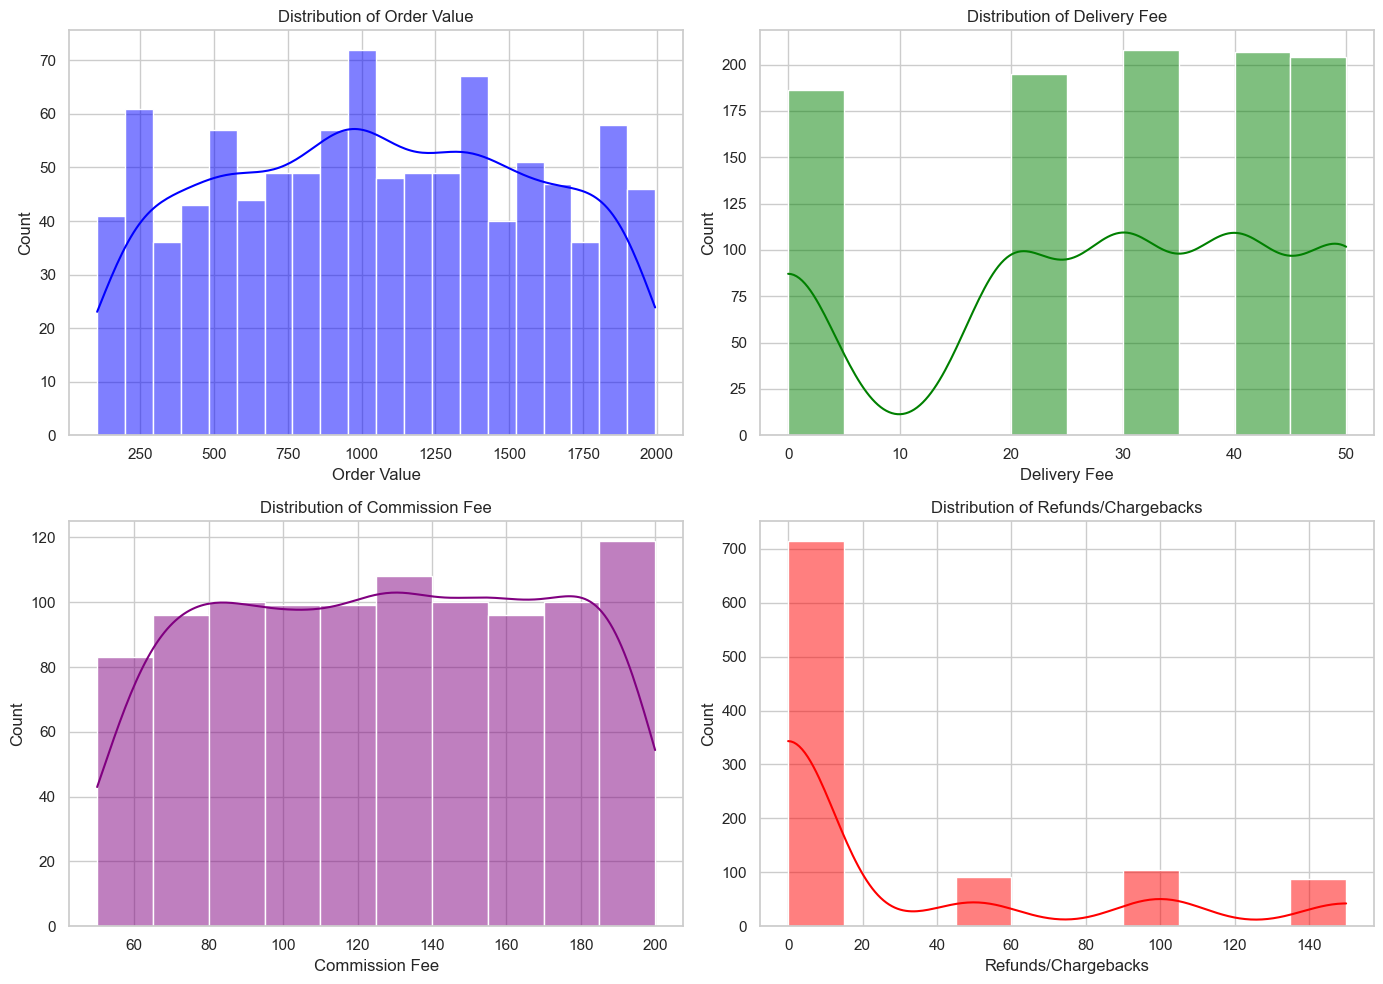

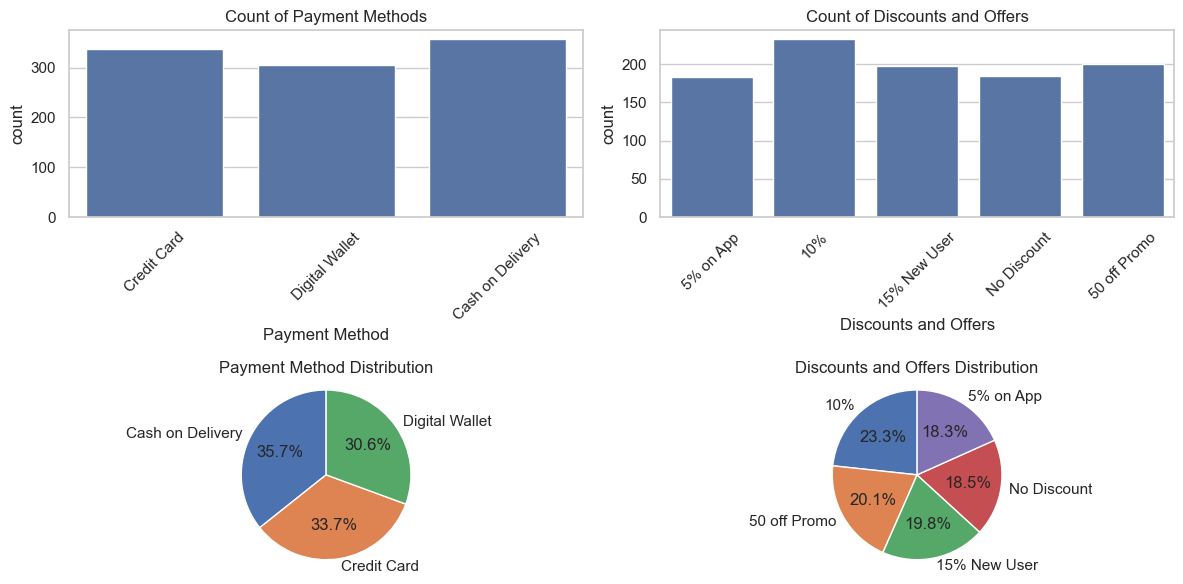

In [122]:
# Set up the plot
plt.figure(figsize=(14, 10))

# Histograms for 'Order Value', 'Delivery Fee', 'Commission Fee', and 'Refunds/Chargebacks'
plt.subplot(2, 2, 1)
sns.histplot(df['Order Value'], bins=20, color='blue', kde=True)
plt.title('Distribution of Order Value')

plt.subplot(2, 2, 2)
sns.histplot(df['Delivery Fee'], bins=10, color='green', kde=True)
plt.title('Distribution of Delivery Fee')

plt.subplot(2, 2, 3)
sns.histplot(df['Commission Fee'], bins=10, color='purple', kde=True)
plt.title('Distribution of Commission Fee')

plt.subplot(2, 2, 4)
sns.histplot(df['Refunds/Chargebacks'], bins=10, color='red', kde=True)
plt.title('Distribution of Refunds/Chargebacks')

plt.tight_layout()
plt.show()

# Bar plots for categorical variables: 'Payment Method' and 'Discounts and Offers'
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.countplot(x='Payment Method', data=df)
plt.title('Count of Payment Methods')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
sns.countplot(x='Discounts and Offers', data=df)
plt.title('Count of Discounts and Offers')
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
payment_counts = df['Payment Method'].value_counts()
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Payment Method Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is a circle.

# Pie chart for Discounts and Offers
plt.subplot(2, 2, 4)
discount_counts = df['Discounts and Offers'].value_counts()
plt.pie(discount_counts, labels=discount_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Discounts and Offers Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is a circle.


plt.tight_layout()
plt.show()

,Restaurant ID,count
0,R2317,6
1,R2804,5
2,R2726,5
3,R2523,5
4,R2016,5


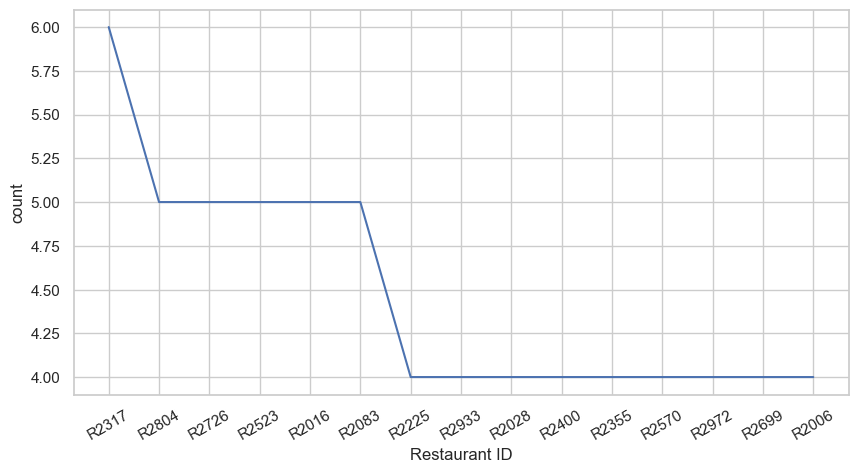

In [119]:
# Finding the top restaurants by order count

plt.figure(figsize=(10,5))
plt.xticks(rotation=30)

top_restaurants = df['Restaurant ID'].value_counts().head(15).reset_index()
sns.lineplot(x='Restaurant ID',y='count',data=top_restaurants)

top_restaurants.head()

In [120]:
# Grouping the data by 'Discounts and Offers' and calculating the average price and count of orders
discount_stats = df.groupby('Discounts and Offers').agg(
    average_price=('Order Value', 'mean'),
    order_count=('Order Value', 'count'),
    average_commission=('Commission Fee', 'mean'),
    average_delivery_fee=('Delivery Fee', 'mean')
).reset_index().sort_values(by='order_count', ascending=False)

# Displaying the result
print(discount_stats)


  Discounts and Offers  average_price  order_count  average_commission  \
0                  10%    1053.755365          233          126.193133   
3         50 off Promo    1094.706468          201          130.527363   
1         15% New User    1008.070707          198          125.808081   
4          No Discount    1047.875676          185          125.362162   
2            5% on App    1065.316940          183          127.043716   

   average_delivery_fee  
0             27.811159  
3             29.402985  
1             27.929293  
4             29.783784  
2             28.360656  


# Multivariate Analysis:

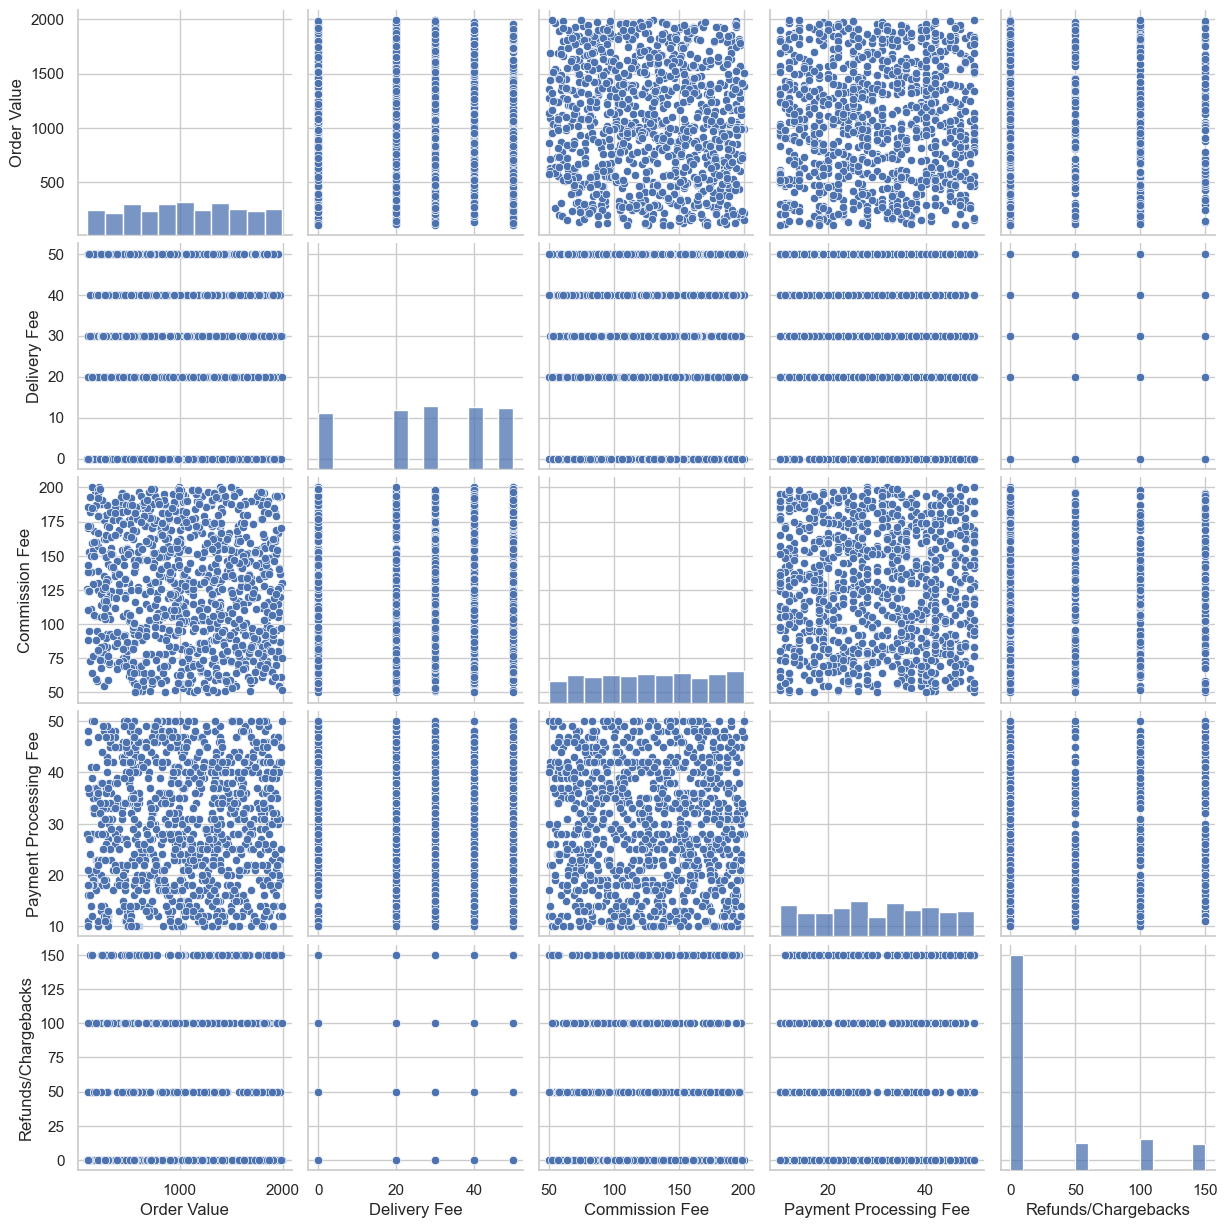

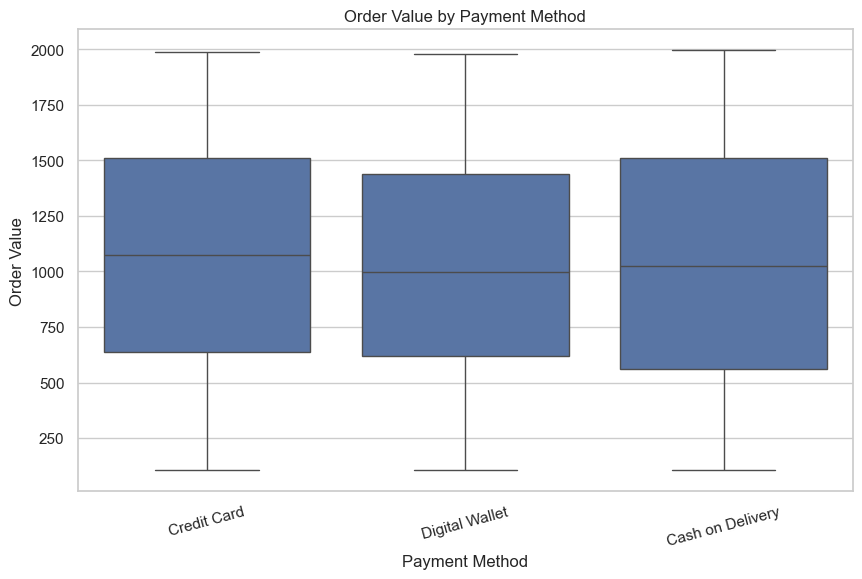

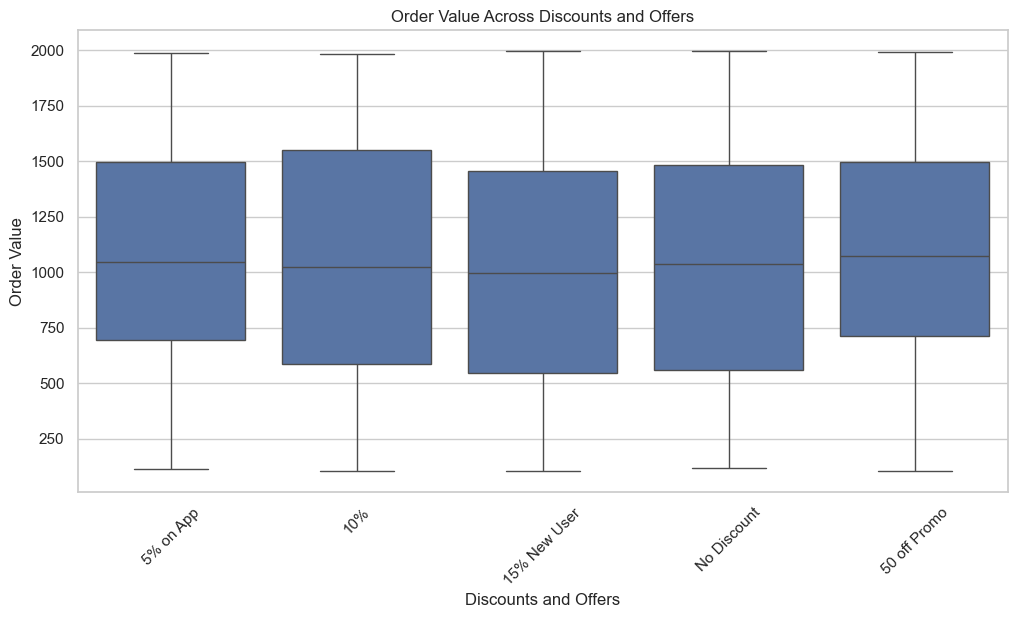

In [121]:
# Pair-plot for numerical variables
sns.pairplot(df[['Order Value', 'Delivery Fee', 'Commission Fee', 'Payment Processing Fee', 'Refunds/Chargebacks']])
plt.show()

# Box plot for 'Order Value' by 'Payment Method'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Payment Method', y='Order Value', data=df)
plt.title('Order Value by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Order Value')
plt.xticks(rotation=15)
plt.show()

# Box plot for 'Order Value' by 'Discounts and Offers'
plt.figure(figsize=(12, 6))
sns.boxplot(x='Discounts and Offers', y='Order Value', data=df)
plt.title('Order Value Across Discounts and Offers')
plt.xticks(rotation=45)
plt.show()
